<h1 style='color:blue'> CIFAR-10 Image Classification</h1>

<h1 style='color:blue'> Import Libraries & Dataset Preparation</h1>

### 📊 CIFAR-10 Dataset Description

The **CIFAR-10** dataset is a well-known benchmark dataset in computer vision, commonly used for training machine learning and deep learning models for image classification.

#### 📁 Dataset Details:
- **Total samples:** 60,000 color images
- **Image size:** 32 × 32 pixels
- **Color channels:** RGB (3 channels)
- **Number of classes:** 10
- **Class labels:**  
  - 0 → Airplane  
  - 1 → Automobile  
  - 2 → Bird  
  - 3 → Cat  
  - 4 → Deer  
  - 5 → Dog  
  - 6 → Frog  
  - 7 → Horse  
  - 8 → Ship  
  - 9 → Truck

#### 🔄 Dataset Split:
- **Training set:** 50,000 images
- **Test set:** 10,000 images

#### 🛠 Preprocessing Applied:
- Pixel values are **normalized** to the range `[0, 1]` by dividing by 255.
- Labels are **one-hot encoded** for use in multiclass classification.
- Data augmentation techniques (rotation, shifting, zoom, flipping) are applied to increase generalization and prevent overfitting.

The CIFAR-10 dataset is available directly through TensorFlow (`tf.keras.datasets.cifar10`) and serves as a foundational dataset for developing and testing convolutional neural network (CNN) architectures.


In [5]:
# 1. Import Required Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import random

# 2. Load and Preprocess Data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize images
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0

# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat  = to_categorical(y_test, 10)

# Class names
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# 3. Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)


<h1 style='color:blue'> Display 8 Sample of Images from Original Dataset</h1>

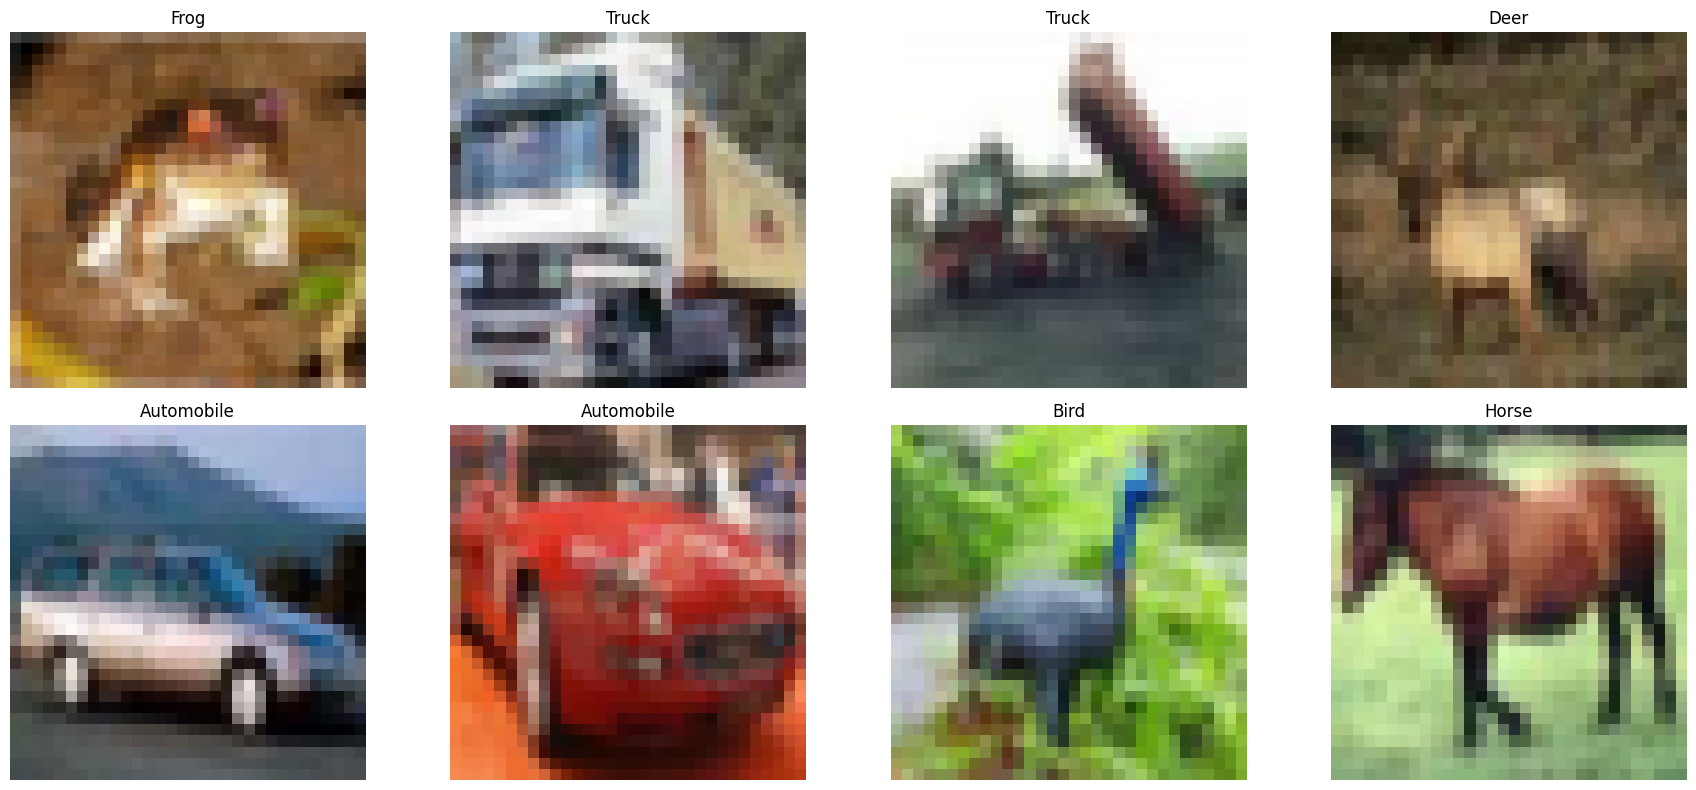

In [6]:
# Display 8 sample images from training set in 2 rows
def show_sample_images(images, labels, class_names, n=8):
    plt.figure(figsize=(18, 8))
    for i in range(n):
        plt.subplot(2, 4, i + 1)
        plt.imshow(images[i])
        plt.title(class_names[labels[i][0]])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Call function with training images
show_sample_images(x_train, y_train, class_names)


<h1 style='color:blue'> Build the CNN Model</h1>

In [13]:
# 4. Build the CNN Model
model = models.Sequential([
    layers.Conv2D(64, (3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(1e-4), input_shape=(32,32,3)),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.3),

    layers.Conv2D(128, (3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.4),

    layers.Flatten(),
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,362,698 (9.01 MB)

 Trainable params: 2,361,418 (9.01 MB)

 Non-trainable params: 1,280 (5.00 KB)

<h1 style='color:blue'> Train the Model</h1>

In [8]:
# 5. Compile Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 6. Define Callbacks
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

callbacks = [
    ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, verbose=1),
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)
]

# 7. Train the Model
history = model.fit(
    datagen.flow(x_train, y_train_cat, batch_size=64),
    steps_per_epoch=len(x_train) // 64,
    validation_data=(x_test, y_test_cat),
    epochs=100,
    callbacks=callbacks,
    verbose=2
)


Epoch 1/100
781/781 - 39s - 50ms/step - accuracy: 0.4433 - loss: 1.7382 - val_accuracy: 0.5473 - val_loss: 1.4011 - learning_rate: 0.0010
Epoch 2/100
781/781 - 1s - 1ms/step - accuracy: 0.5312 - loss: 1.3718 - val_accuracy: 0.5609 - val_loss: 1.3585 - learning_rate: 0.0010
Epoch 3/100
781/781 - 25s - 32ms/step - accuracy: 0.5976 - loss: 1.2747 - val_accuracy: 0.6239 - val_loss: 1.2382 - learning_rate: 0.0010
Epoch 4/100
781/781 - 1s - 1ms/step - accuracy: 0.6719 - loss: 1.1757 - val_accuracy: 0.6252 - val_loss: 1.2339 - learning_rate: 0.0010
Epoch 5/100
781/781 - 24s - 31ms/step - accuracy: 0.6492 - loss: 1.1542 - val_accuracy: 0.6745 - val_loss: 1.1090 - learning_rate: 0.0010
Epoch 6/100
781/781 - 1s - 1ms/step - accuracy: 0.6562 - loss: 1.3182 - val_accuracy: 0.6702 - val_loss: 1.1285 - learning_rate: 0.0010
Epoch 7/100
781/781 - 24s - 31ms/step - accuracy: 0.6775 - loss: 1.1204 - val_accuracy: 0.7008 - val_loss: 1.0672 - learning_rate: 0.0010
Epoch 8/100
781/781 - 1s - 1ms/step - ac

<h1 style='color:blue'> Plot Training Curves</h1>

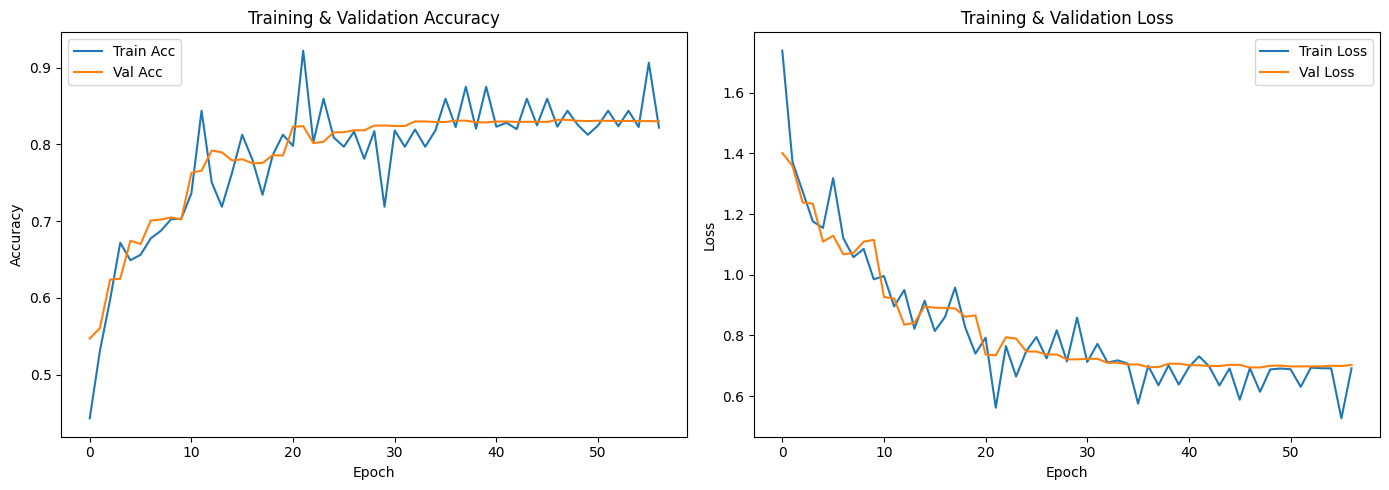

In [9]:
# 8. Plot Accuracy and Loss
plt.figure(figsize=(14, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


<h1 style='color:blue'> Evaluate the Model</h1>

In [10]:
# 9. Evaluate on Test Data
test_loss, test_accuracy = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")


Test Accuracy: 0.8319


<h1 style='color:blue'> Confusion Matrix</h1>

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


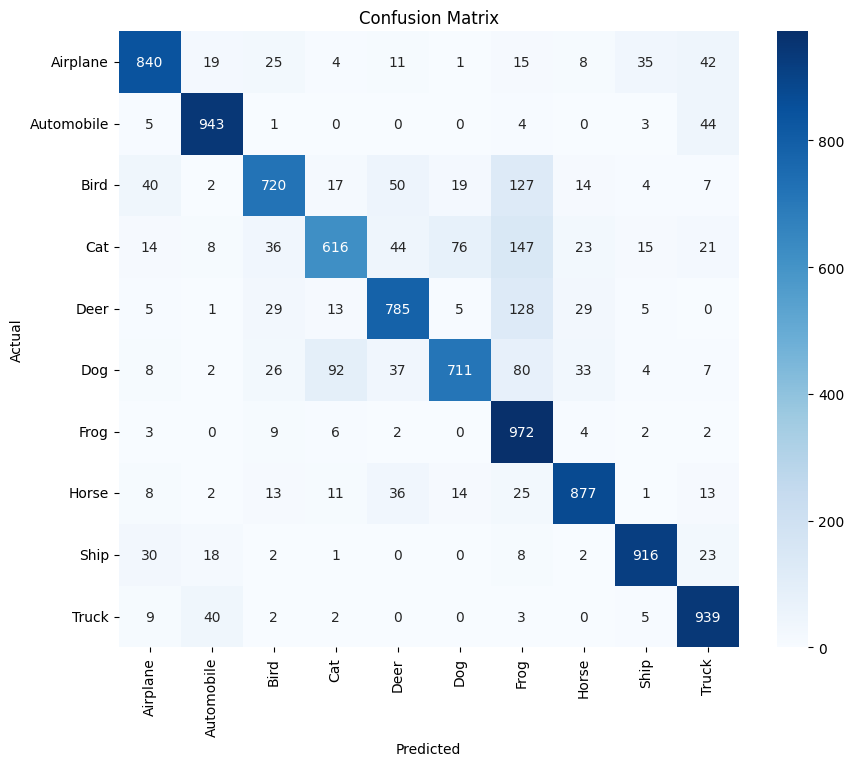


Classification Report:

              precision    recall  f1-score   support

    Airplane       0.87      0.84      0.86      1000
  Automobile       0.91      0.94      0.93      1000
        Bird       0.83      0.72      0.77      1000
         Cat       0.81      0.62      0.70      1000
        Deer       0.81      0.79      0.80      1000
         Dog       0.86      0.71      0.78      1000
        Frog       0.64      0.97      0.77      1000
       Horse       0.89      0.88      0.88      1000
        Ship       0.93      0.92      0.92      1000
       Truck       0.86      0.94      0.90      1000

    accuracy                           0.83     10000
   macro avg       0.84      0.83      0.83     10000
weighted avg       0.84      0.83      0.83     10000



In [11]:
# 10. Confusion Matrix
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = y_test.flatten()

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred_classes, target_names=class_names))


<h1 style='color:blue'> Show Predictions on Random Test Images</h1>

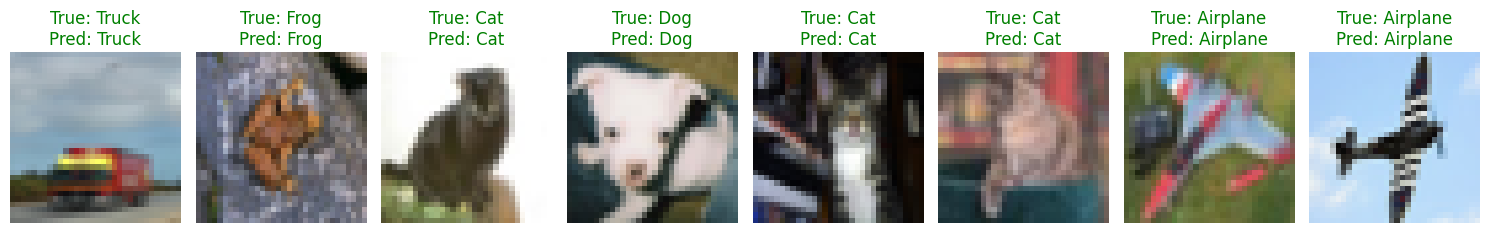

In [12]:
# 11. Show Predictions on Random Test Images
def show_predictions(n=6):
    indices = random.sample(range(len(x_test)), n)
    plt.figure(figsize=(15, 3))
    for i, idx in enumerate(indices):
        img = x_test[idx]
        true_label = class_names[y_test[idx][0]]
        pred_label = class_names[y_pred_classes[idx]]
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.title(f"True: {true_label}\nPred: {pred_label}", color='green' if true_label == pred_label else 'red')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

show_predictions(8)
